<a href="https://colab.research.google.com/github/Amolrakhunde/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

**STEPS:**


*   STEP 0: Import Libraries and making DataFrame
*   STEP 1: Exploration
*   STEP 2: Looking for and handling NaN/Null/Missing Values
*   STEP 3: Each column wise trying to get some conclusions and trends
*   STEP 4: Trying to get some conclusions from data, correlation, trends and making sense in doing so
*   STEP 5: Final summary of conclusion


# **STEP 0: Import Libraries and making DataFrame**

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [128]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
directory_path = '/content/drive/MyDrive/Alma Better/EDA Projects/Hotel Booking Analysis/'
df = pd.read_csv(directory_path + 'Hotel Bookings.csv')

# **STEP 1: Exploration**

In [130]:
df.shape

(119390, 32)

In [131]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [132]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


# **STEP 2: Looking for and handling NaN/Null/Missing Values**

In [133]:
df.isna().sum().sort_index()

adr                                    0
adults                                 0
agent                              16340
arrival_date_day_of_month              0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_year                      0
assigned_room_type                     0
babies                                 0
booking_changes                        0
children                               4
company                           112593
country                              488
customer_type                          0
days_in_waiting_list                   0
deposit_type                           0
distribution_channel                   0
hotel                                  0
is_canceled                            0
is_repeated_guest                      0
lead_time                              0
market_segment                         0
meal                                   0
previous_bookings_not_canceled         0
previous_cancell

We have four columns with missing data, lets handel all missings value from each column

In [134]:
# filling all na values with 0 in column: children, agent and company
df[['children','agent','company']] = df[['children','agent','company']].fillna(0.0)

In [135]:
# filling all na values from country with mode of non na values from country column
df['country'].fillna(df['country'].mode().to_string(), inplace=True)

In [136]:
## Drop Rows where there is no adult, baby and child
df = df.drop(df[(df.adults+df.babies+df.children)==0].index)

In [137]:
# check for new shape after droping
df.shape

(119210, 32)

In [138]:
# dealing with missing and outliers in column adr
df['adr'].describe()

count    119210.000000
mean        101.969092
std          50.434007
min          -6.380000
25%          69.500000
50%          94.950000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

adr for some rows zero and even negative also and in some cases it is very low and very high.

Get outliers and remove them from adr

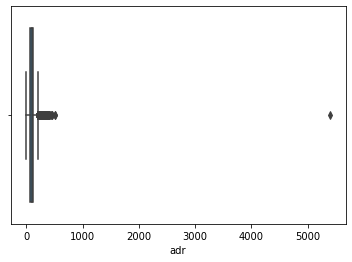

In [139]:
# box plot which shows outliers and quartile
sns.boxplot(x=df['adr'])

In [140]:
df['adr'].describe()

count    119210.000000
mean        101.969092
std          50.434007
min          -6.380000
25%          69.500000
50%          94.950000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [141]:
Q1 = 69.5
Q2 = 94.95
Q3 = 126.0
IQR = Q3 -Q1

In [142]:
# droping outliers which are bellow Q3-1.5*IQR
df.drop(df[df['adr'] < Q3 -1.5*IQR].index, inplace=True)

In [143]:
# droping outliers which are above Q3+1.5*IQR
df.drop(df[df['adr'] > Q3 +1.5*IQR].index, inplace=True)

In [144]:
# we get new shape after droping outliers
df.shape

(108355, 32)

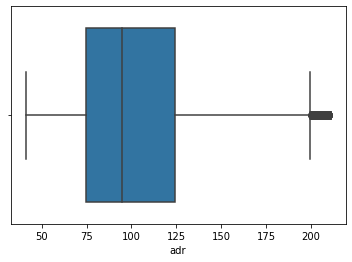

In [145]:
# check for outliers compare to earlier
sns.boxplot(x=df['adr'])

In [146]:
# Check for missing values
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

Yeah! We are done with handelling missing data.

**Looking for datatype changes in columns**

In [147]:
# changing datatype from float to int in column: children, agent and company
df[['children','agent','company']] = df[['children','agent','company']].astype(int)

In [148]:
# getting reservation_status_date in proper datetime datatype
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [149]:
# Check for datatypes of all column as required
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108355 entries, 2 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           108355 non-null  object        
 1   is_canceled                     108355 non-null  int64         
 2   lead_time                       108355 non-null  int64         
 3   arrival_date_year               108355 non-null  int64         
 4   arrival_date_month              108355 non-null  object        
 5   arrival_date_week_number        108355 non-null  int64         
 6   arrival_date_day_of_month       108355 non-null  int64         
 7   stays_in_weekend_nights         108355 non-null  int64         
 8   stays_in_week_nights            108355 non-null  int64         
 9   adults                          108355 non-null  int64         
 10  children                        108355 non-null  int64  

# **STEP 3: Each column wise trying to get some conclusions and trends**

## **Column:** hotel

In [150]:
categories_in_hotel = df.hotel.unique()
print(categories_in_hotel)

['Resort Hotel' 'City Hotel']


In [151]:
df.hotel = df.hotel.str.replace(' ','_')

Those are the bookings which might get canceled and some may remain not canceled later.

Text(0.5, 1.0, 'Types of Hotel')

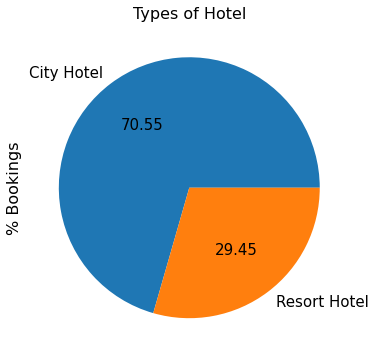

In [152]:
df.groupby('hotel').size().plot(kind='pie', labels=["City Hotel", "Resort Hotel"], fontsize=15, autopct='%.2f',  figsize=(6, 6))
plt.ylabel('% Bookings' , fontsize=16)
plt.title('Types of Hotel', fontsize=16)

**Conclusion:** There is almost double bookings in City Hotel as compared to Resort Hotel.

## **Column:** is_canceled

In [153]:
categories_in_is_canceled = df.is_canceled.unique()
print(categories_in_is_canceled)

[0 1]


0 for Booking Not Canceled;
1 for Booking Canceled OR No Show

In [154]:
# replace 0 by Not canceled and 1 by Canceled
df.is_canceled = df.is_canceled.replace(0,'Not_Canceled').replace(1, 'Canceled')

Text(0.5, 1.0, 'Bookings Cancelation Status')

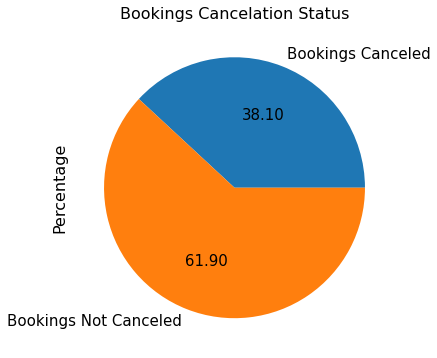

In [155]:
df.groupby('is_canceled').size().plot(kind='pie', labels=["Bookings Canceled", "Bookings Not Canceled"], fontsize=15, autopct='%.2f',  figsize=(6, 6))
plt.ylabel('Percentage' , fontsize=16)
plt.title('Bookings Cancelation Status', fontsize=16)

**Conclusion:** 38% of bookings gets canceled.

## **Column:** lead_time

Booking **Lead Time** is the period of time between when a guest makes a reservation, and the actual check-in date

Lead time will be zero for same day booking

In [156]:
same_day_booking= round(df['lead_time'].value_counts(normalize=True) * 100, 2)[0]
print(f"Same day bookings are {same_day_booking}%")
within_week_booking= round((df['lead_time'].value_counts(normalize=True) * 100)[1:8].sum(), 0)
print(f"Within a week bookings are {within_week_booking}%")
within_month_booking= round((df['lead_time'].value_counts(normalize=True) * 100)[0:31].sum(), 0)
print(f"Within a month bookings are {within_month_booking}%")
within_3_months_booking= round((df['lead_time'].value_counts(normalize=True) * 100)[0:91].sum(), 0)
print(f"Within 3 months bookings are {within_3_months_booking}%")
within_6_months_booking= round((df['lead_time'].value_counts(normalize=True) * 100)[0:181].sum(), 0)
print(f"Within 6 months bookings are {within_6_months_booking}%")
within_year_booking= round((df['lead_time'].value_counts(normalize=True) * 100)[0:366].sum(), 0)
print(f"Within a year bookings are {within_year_booking}%")

Same day bookings are 4.53%
Within a week bookings are 10.0%
Within a month bookings are 31.0%
Within 3 months bookings are 56.0%
Within 6 months bookings are 79.0%
Within a year bookings are 98.0%


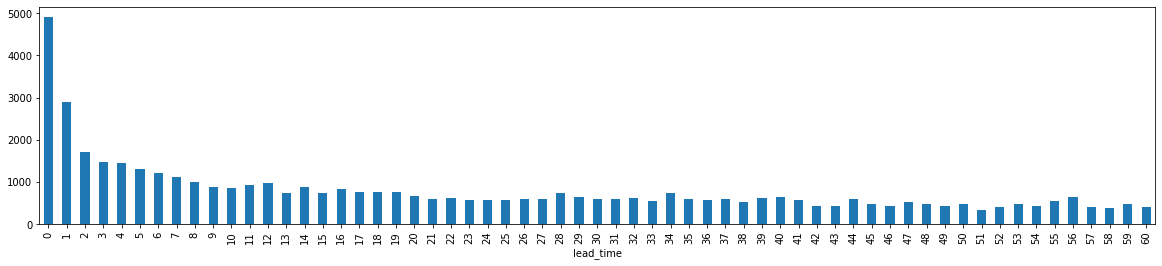

In [157]:
df.groupby('lead_time').size()[:61].plot(kind='bar', figsize=(20, 4))

**Conlusion:**
1. 5.31% bookings are same day booking which means that people prefers to book hotel earlier.

2. Almost 60% of bookings are done within 90 days of arrival.

## **Column:** arrival_date_year

Text(0.5, 1.0, 'Year WIse Bookings')

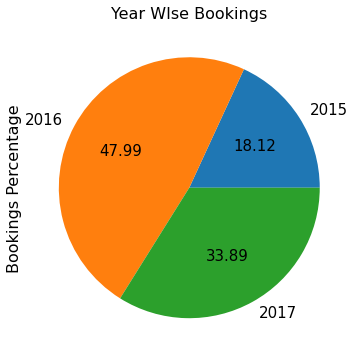

In [158]:
df.groupby('arrival_date_year').size().plot(kind='pie', fontsize=15, autopct='%.2f',  figsize=(6, 6))
plt.ylabel('Bookings Percentage' , fontsize=16)
plt.title('Year WIse Bookings', fontsize=16)

## **Column:** arrival_date_month

Text(0.5, 1.0, 'Monthly Bookings count')

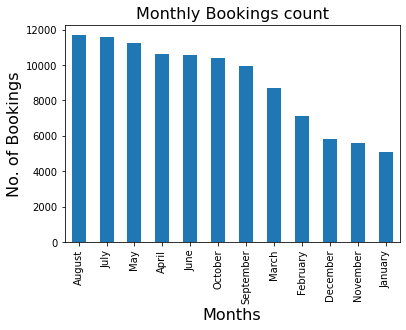

In [159]:
df['arrival_date_month'].value_counts().plot(kind='bar')
plt.xlabel('Months' , fontsize=16)
plt.ylabel('No. of Bookings' , fontsize=16)
plt.title('Monthly Bookings count', fontsize=16)

**Conclusion:**
1. Highest hotel bookings are in month August.
2. Lowest hotel bookings are in month January.

## **Column:** arrival_date_week_number

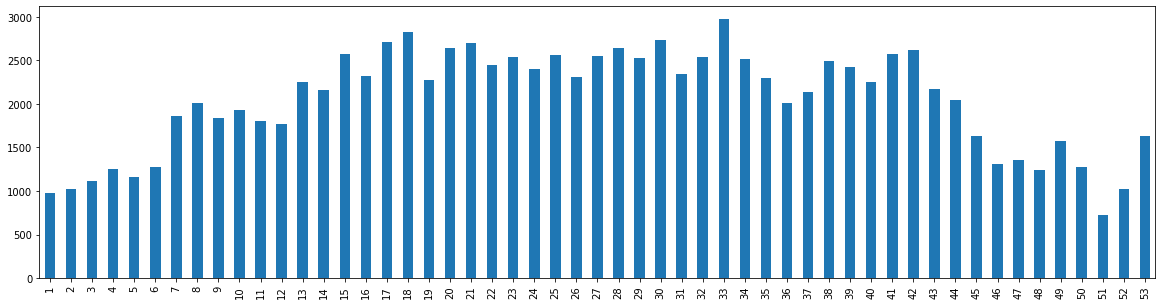

In [160]:
df['arrival_date_week_number'].value_counts().sort_index().plot(kind='bar', figsize=(20,5))

**Conclusion:**
1. Highest hotel bookings are in week 33.
2. Lowest hotel bookings are in week 51.

## **Column:** arrival_date_day_of_month

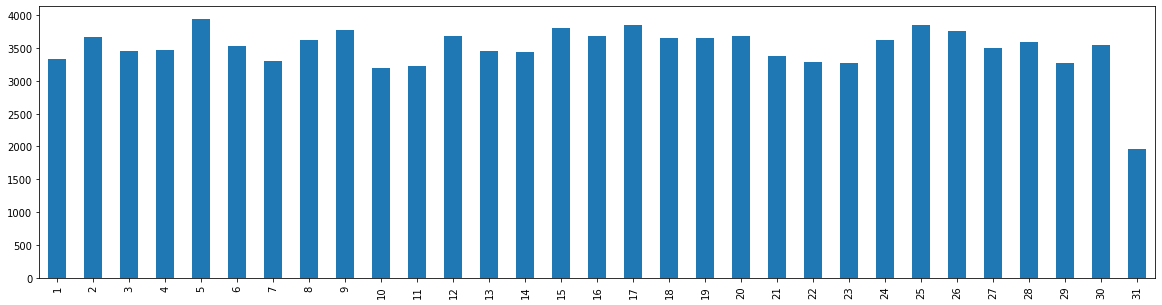

In [161]:
df['arrival_date_day_of_month'].value_counts().sort_index().plot(kind='bar', figsize=(20,5))

Nothing relevent here to conclude.

## **Column:** stays_in_weekend_nights

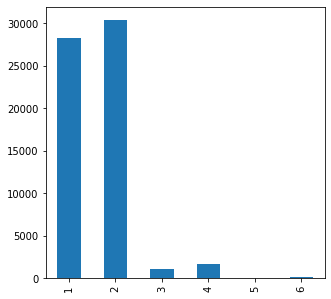

In [162]:
df['stays_in_weekend_nights'].value_counts().sort_index()[1:7].plot(kind='bar', figsize=(5,5))

**Conclusion:** Most of the bookings are for two nights.

## **Column:**stays_in_week_nights

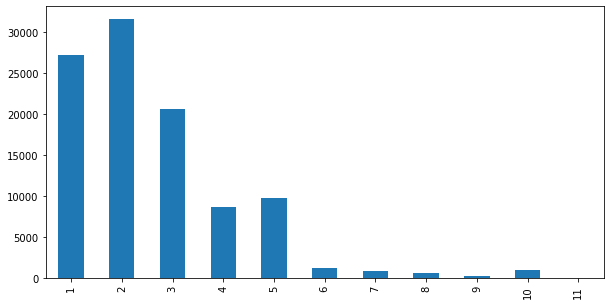

In [163]:
df['stays_in_week_nights'].value_counts().sort_index()[1:12].plot(kind='bar', figsize=(10,5))

**Conclusion:** Most of the bookings are for two nights.

## **Column:**adults

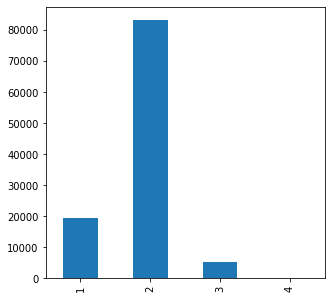

In [164]:
df['adults'].value_counts().sort_index()[1:6].plot(kind='bar', figsize=(5,5))

In [165]:
df['adults'].value_counts().sort_index()

0      189
1    19445
2    83289
3     5399
4       33
Name: adults, dtype: int64

## **Column:**children

In [166]:
round(df['children'].value_counts(normalize=True) * 100, 2)

0     93.78
1      3.91
2      2.28
3      0.02
10     0.00
Name: children, dtype: float64

Text(0, 0.5, '')

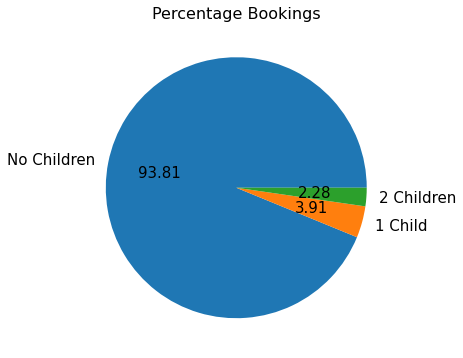

In [167]:
df.groupby('children').size()[0:3].plot(kind='pie', labels=["No Children", "1 Child", "2 Children"], fontsize=15, autopct='%.2f',  figsize=(6, 6))
plt.title('Percentage Bookings', fontsize=16)
plt.ylabel('')

## **Column:**babies

Text(0, 0.5, '')

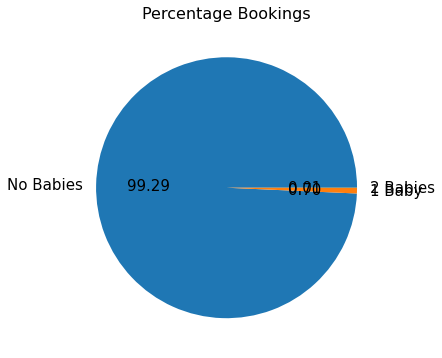

In [168]:
df.groupby('babies').size()[0:3].plot(kind='pie', labels=["No Babies", "1 Baby", "2 Babies"], fontsize=15, autopct='%.2f',  figsize=(6, 6))
plt.title('Percentage Bookings', fontsize=16)
plt.ylabel('')

In [169]:
round(df['babies'].value_counts(normalize=True) * 100, 2)

0     99.29
1      0.70
2      0.01
10     0.00
9      0.00
Name: babies, dtype: float64

## **Column:** meal

Text(0, 0.5, '')

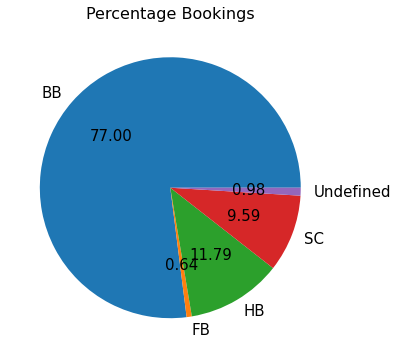

In [170]:
df.groupby('meal').size().plot(kind='pie', labels=["BB", "FB", "HB", "SC", "Undefined"], fontsize=15, autopct='%.2f',  figsize=(6, 6))
plt.title('Percentage Bookings', fontsize=16)
plt.ylabel('')

- BB: Bed & Breakfast

- HB: Half Board (Breakfast and Dinner normally)

- FB: Full Board (Beakfast, Lunch and Dinner)

- SC: Self Catering

## **`Column:`** country

Text(0, 0.5, 'No. of Bookings')

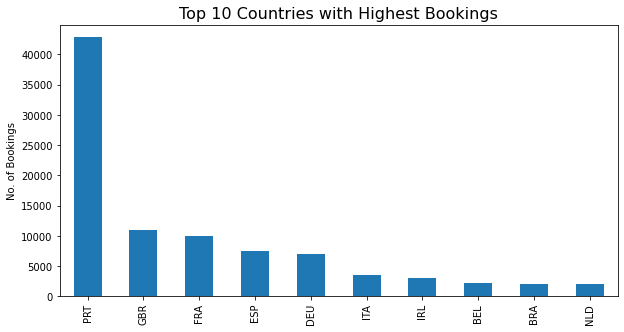

In [171]:
df['country'].value_counts()[:10].plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Countries with Highest Bookings', fontsize=16)
plt.ylabel('No. of Bookings')

**Conclusion:** Country which has highest number of bookings was PRT

In [172]:
bookings_of_top_10_countries = (df['country'].value_counts(normalize=True)*100)[:10].sum()
print(f"Above top 10 countries with highest bookings altogher cover {round(bookings_of_top_10_countries, 2)}% bookings.")

Above top 10 countries with highest bookings altogher cover 84.14% bookings.


## **Column:** market_segment

Text(0, 0.5, 'Percentage Bookings')

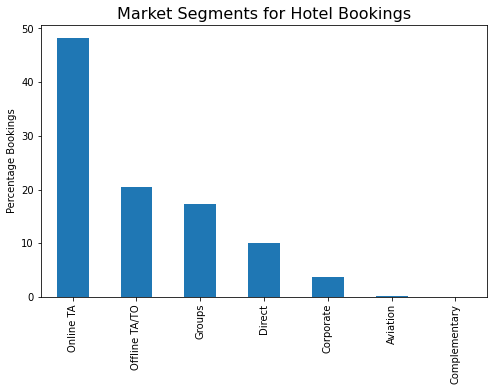

In [173]:
round(df['market_segment'].value_counts(normalize=True) * 100, 2).plot(kind='bar', figsize=(8,5))
plt.title('Market Segments for Hotel Bookings', fontsize=16)
plt.ylabel('Percentage Bookings')

In [174]:
round(df['market_segment'].value_counts(normalize=True) * 100, 2)

Online TA        48.21
Offline TA/TO    20.50
Groups           17.23
Direct           10.03
Corporate         3.79
Aviation          0.21
Complementary     0.02
Name: market_segment, dtype: float64

**Conclusion:**

Maximum bookings are from Online TA (Travel Agent) which 47.30%.

Bookings with Online TA and Offline TA/TO is almost 70% that means maximum hotel are booked with agents only.

Direct bookings are 10.56% which shows that maximum people have tendacy of booking hotel prior to arrival.

## **Column:** distribution_channel

In [175]:
round(df['distribution_channel'].value_counts(normalize=True) * 100, 2)

TA/TO        83.86
Direct       11.18
Corporate     4.79
GDS           0.17
Undefined     0.00
Name: distribution_channel, dtype: float64

Text(0, 0.5, 'Percentage Bookings')

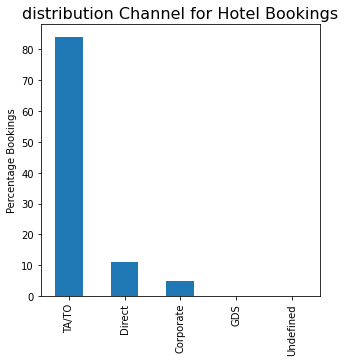

In [176]:
round(df['distribution_channel'].value_counts(normalize=True) * 100, 2).plot(kind='bar', figsize=(5,5))
plt.title('distribution Channel for Hotel Bookings', fontsize=16)
plt.ylabel('Percentage Bookings')

**Conclusion:**

Hotels prefers almost 82% of TA/TO as their Distribution Channel which justify with 70% bookings are through Online TA and Offline TA/TO.

## **Column:** is_repeated_guest

In [177]:
categories_in_is_repeated_guest = df.is_repeated_guest.unique()
print(categories_in_is_repeated_guest)

[0 1]


0 : guest not repeated

1 : guest repeated

In [178]:
# replace 0 with Not_repeated and 1 with Repeated
df.is_repeated_guest = df.is_repeated_guest.replace(0,'Not_Repeated').replace(1, 'Repeated')

Text(0.5, 1.0, 'Guest Repeated OR Not')

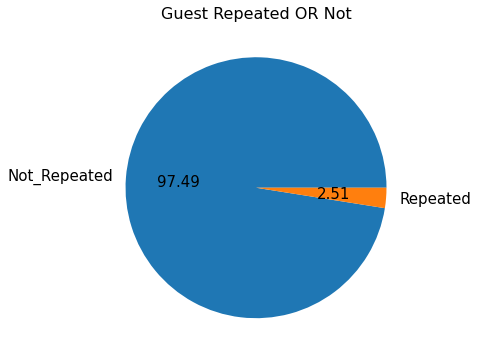

In [179]:
df.groupby('is_repeated_guest').size().plot(kind='pie', fontsize=15, autopct='%.2f',  figsize=(6, 6))
plt.ylabel('' , fontsize=16)
plt.title('Guest Repeated OR Not', fontsize=16)

**Conclusion:** Only 2.51% bookings are by repeated guest.

## **Column:** booking_changes

Text(0.5, 0, 'No. of Changes Made')

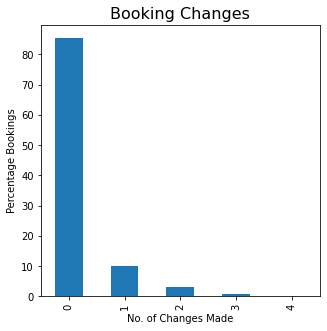

In [180]:
round(df['booking_changes'].value_counts(normalize=True) * 100, 2)[0:5].plot(kind='bar', figsize=(5,5))
plt.title('Booking Changes', fontsize=16)
plt.ylabel('Percentage Bookings')
plt.xlabel('No. of Changes Made')

**Conclusion:**

About 85% of bookings never changed.

## **`Column:`** deposit_type

In [181]:
round(df['deposit_type'].value_counts(normalize=True) * 100, 2)

No Deposit    86.72
Non Refund    13.13
Refundable     0.14
Name: deposit_type, dtype: float64

Text(0.5, 1.0, 'Types of Deposit')

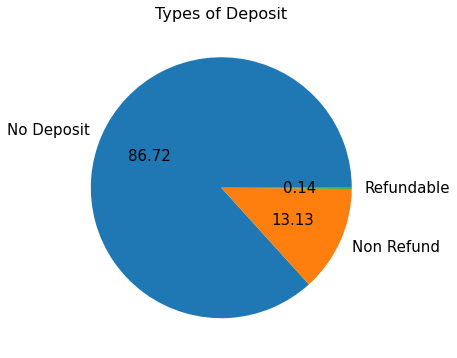

In [182]:
df.groupby('deposit_type').size().plot(kind='pie', fontsize=15, autopct='%.2f',  figsize=(6, 6))
plt.ylabel('' , fontsize=16)
plt.title('Types of Deposit', fontsize=16)

**Conclusion:**

About 88% bookings are without any deposit. (Flexibility to cancel or change bookings without losing any money must be the main reason)

About 12.22% bookings are non refundable.(Those bookings might be done because of offer of lower prices than bookings without any deposit)

## **Column:** days_in_waiting_list

In [183]:
round(df['days_in_waiting_list'].value_counts(normalize=True) * 100, 2).sort_index().reset_index()

,index,days_in_waiting_list
0,0,96.66
1,1,0.01
2,2,0.00
3,3,0.05
4,4,0.02
...,...,...
121,236,0.03
122,259,0.01
123,330,0.01
124,379,0.01


Text(0.5, 0, 'Days')

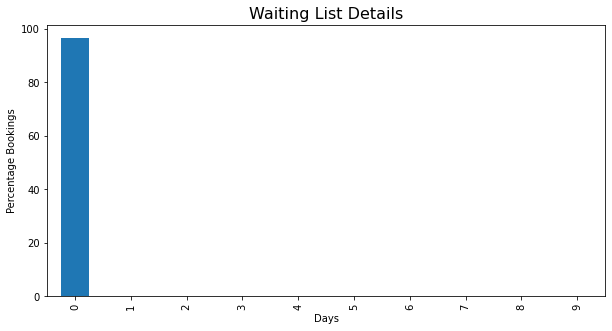

In [184]:
round(df['days_in_waiting_list'].value_counts(normalize=True) * 100, 2).sort_index()[:10].plot(kind='bar', figsize=(10,5))
plt.title('Waiting List Details', fontsize=16)
plt.ylabel('Percentage Bookings')
plt.xlabel('Days')

**Conclusion:**

Almost for 97% bookings there is no waiting list.(Which means that confirmed bookings are mostly prefered)

## **Column:** required_car_parking_spaces

In [185]:
round(df['required_car_parking_spaces'].value_counts(normalize=True) * 100, 2).reset_index()

,index,required_car_parking_spaces
0,0,94.14
1,1,5.83
2,2,0.02
3,3,0.00
4,8,0.00


**Conclusion:**

*   Almost 94% of bookings there is no requirement for car parking spaces.

## **Column:** total_of_special_requests

In [186]:
round(df['total_of_special_requests'].value_counts(normalize=True) * 100, 2).reset_index()

,index,total_of_special_requests
0,0,58.80
1,1,28.04
2,2,10.85
3,3,2.03
4,4,0.25
5,5,0.03


Text(0.5, 1.0, 'Total Special Request')

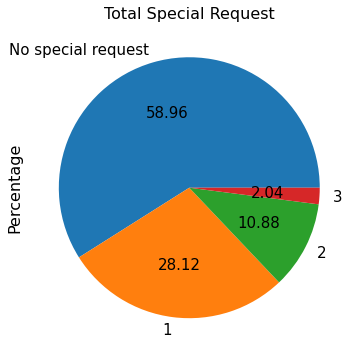

In [187]:
df.groupby('total_of_special_requests').size()[:4].plot(kind='pie', labels=["No special request", 1, 2, 3], fontsize=15, autopct='%.2f',  figsize=(6, 6))
plt.ylabel('Percentage' , fontsize=16)
plt.title('Total Special Request', fontsize=16)

**Conclusion:**

*   About 59% of bookings there are no special requests.
*   27.92% of bookings there is one special request.



## **Column:** reservation_status

Text(0.5, 1.0, 'Reservation Status')

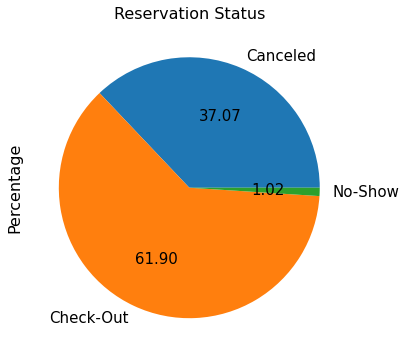

In [188]:
df.groupby('reservation_status').size().plot(kind='pie', fontsize=15, autopct='%.2f',  figsize=(6, 6))
plt.ylabel('Percentage' , fontsize=16)
plt.title('Reservation Status', fontsize=16)

# **STEP 4: Trying to get some conclusions from data, correlation, trends and making sense in doing so**

Till now some conclusion were made with data within each column only.

Now will get conclusions based on correlation and trends considering multiple columns. 

Text(0, 0.5, 'No. of Bookings')

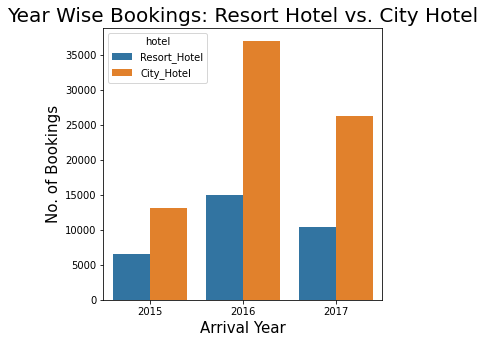

In [189]:
# year wise bookings for each type of hotel
plt.rcParams['figure.figsize']= (5,5)
sns.countplot(data = df, x = 'arrival_date_year', hue = 'hotel')
plt.title('Year Wise Bookings: Resort Hotel vs. City Hotel',fontsize=20)
plt.xlabel('Arrival Year', fontsize=15)
plt.ylabel('No. of Bookings', fontsize=15)

**Conclusion:**

*   For both type hotel there is sudden increase in bookings for year 2016 compared to year 2015 and then significant fall in bookings for year 2017.



Text(0, 0.5, 'No. of Bookings')

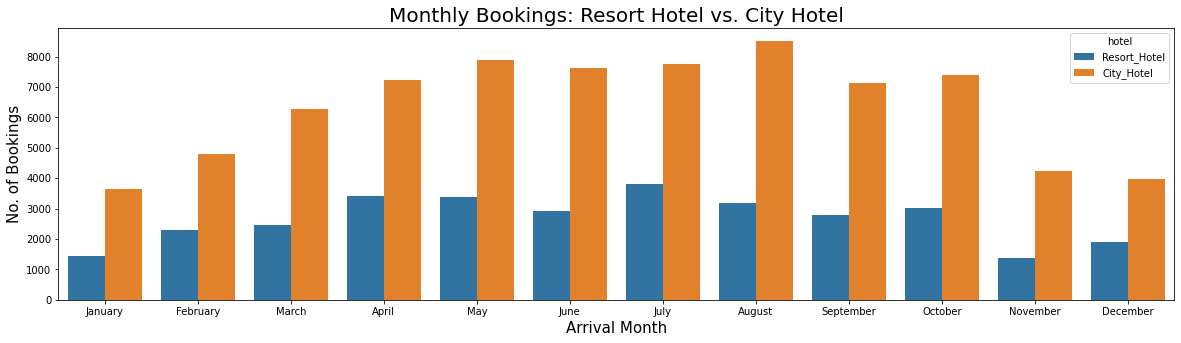

In [190]:
# Month wise bookings for each type of hotel
plt.rcParams['figure.figsize']= (20,5)
sns.countplot(data = df, x = 'arrival_date_month', hue = 'hotel', order= [ 'January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December'])
plt.title('Monthly Bookings: Resort Hotel vs. City Hotel',fontsize=20)
plt.xlabel('Arrival Month', fontsize=15)
plt.ylabel('No. of Bookings', fontsize=15)

**Conclusion:**

*   Highest number of bookings for both type of hotel is in August.
*   Lowest number of bookings for both type of hotel is in January.



Text(0, 0.5, 'No. of Bookings')

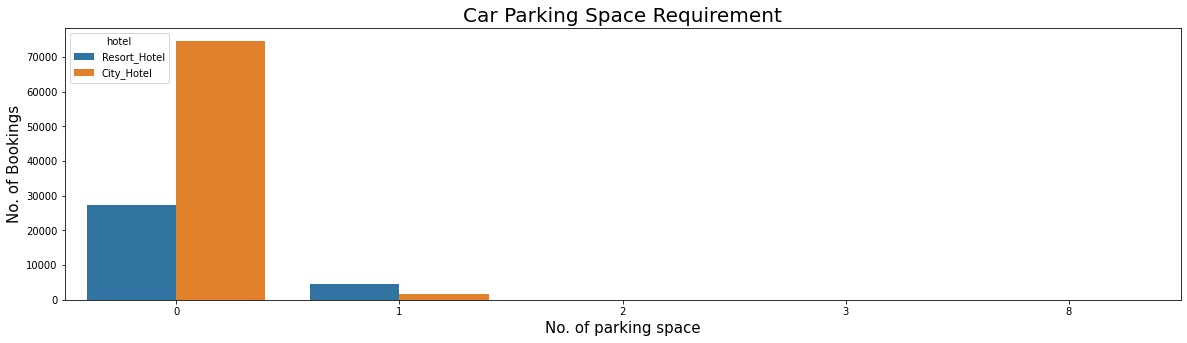

In [191]:
# Day wise bookings for each type of hotel
plt.rcParams['figure.figsize']= (20,5)
sns.countplot(data = df, x = 'required_car_parking_spaces', hue = 'hotel')
plt.title('Car Parking Space Requirement',fontsize=20)
plt.xlabel('No. of parking space', fontsize=15)
plt.ylabel('No. of Bookings', fontsize=15)

**Conclusion:** Car parking space requirement for resort type hotel is greater than city hotel.(It may be because of location of resort type hotel is usually far from city)

Text(0, 0.5, 'No. of Bookings')

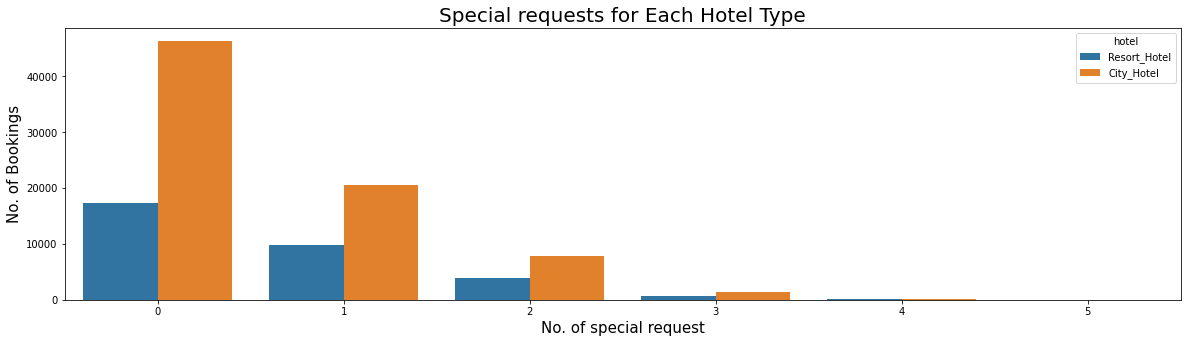

In [192]:
# Day wise bookings for each type of hotel
plt.rcParams['figure.figsize']= (20,5)
sns.countplot(data = df, x = 'total_of_special_requests', hue = 'hotel')
plt.title('Special requests for Each Hotel Type',fontsize=20)
plt.xlabel('No. of special request', fontsize=15)
plt.ylabel('No. of Bookings', fontsize=15)

**Conclusion:** Special requests for both type of hotel is almost same as compared to their number of bookings.

Text(0, 0.5, 'No. of Bookings')

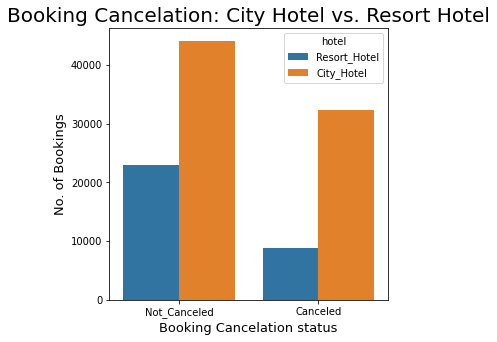

In [193]:
# canceled and not canceled bookings for each type of hotel
plt.rcParams['figure.figsize']= (5,5)
sns.countplot(data = df, x = 'is_canceled', hue = 'hotel')
plt.title('Booking Cancelation: City Hotel vs. Resort Hotel',fontsize=20)
plt.xlabel('Booking Cancelation status', fontsize=13)
plt.ylabel('No. of Bookings', fontsize=13)

In [194]:
non_canceled_df = df[df['is_canceled'] == 'Not_Canceled'].copy(deep=True)
canceled_df = df[df['is_canceled']== 'Canceled'].copy(deep=True)

Text(0.5, 1.0, 'Non Canceled Bookings: City Hotel vs. Resort Hotel')

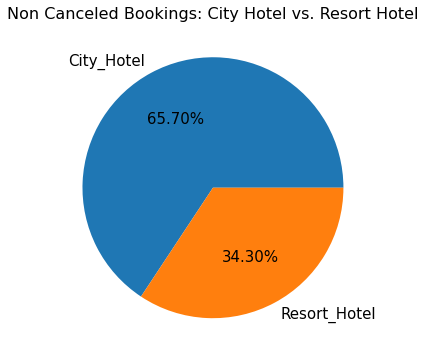

In [195]:
non_canceled_df.groupby('hotel').size().plot(kind='pie', fontsize=15, autopct='%.2f%%',  figsize=(6, 6))
plt.ylabel('' , fontsize=16)
plt.title('Non Canceled Bookings: City Hotel vs. Resort Hotel', fontsize=16)

Text(0.5, 1.0, 'Canceled Bookings: City Hotel vs. Resort Hotel')

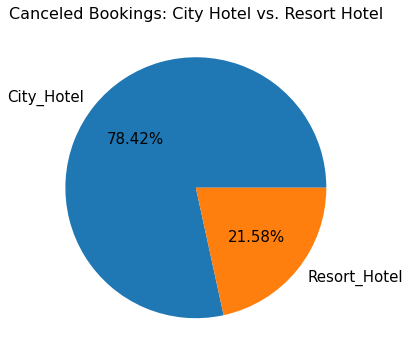

In [196]:
canceled_df.groupby('hotel').size().plot(kind='pie', fontsize=15, autopct='%.2f%%',  figsize=(6, 6))
plt.ylabel('' , fontsize=16)
plt.title('Canceled Bookings: City Hotel vs. Resort Hotel', fontsize=16)

In [197]:
percentage_cancelation_hotel_wise = 100*canceled_df.groupby('hotel').size()/df.groupby('hotel').size()
percentage_cancelation_hotel_wise

hotel
City_Hotel      42.346385
Resort_Hotel    27.915648
dtype: float64

In [198]:
percentage_non_cancelation_hotel_wise = 100*non_canceled_df.groupby('hotel').size()/df.groupby('hotel').size()
percentage_non_cancelation_hotel_wise

hotel
City_Hotel      57.653615
Resort_Hotel    72.084352
dtype: float64

In [199]:
# total guests considering adults and children only excluding babies in counting
non_canceled_df['total_guests'] = non_canceled_df['adults'] + non_canceled_df['children']

In [200]:
non_canceled_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests
2,Resort_Hotel,Not_Canceled,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,Not_Repeated,0,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort_Hotel,Not_Canceled,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,Not_Repeated,0,0,A,A,0,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort_Hotel,Not_Canceled,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,Not_Repeated,0,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2
5,Resort_Hotel,Not_Canceled,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,Not_Repeated,0,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2
6,Resort_Hotel,Not_Canceled,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,Not_Repeated,0,0,C,C,0,No Deposit,0,0,0,Transient,107.0,0,0,Check-Out,2015-07-03,2


**MILESTONE 1:** Have you ever wondered when the best time of year to book a hotel room is? 

Text(0, 0.5, 'Average adr')

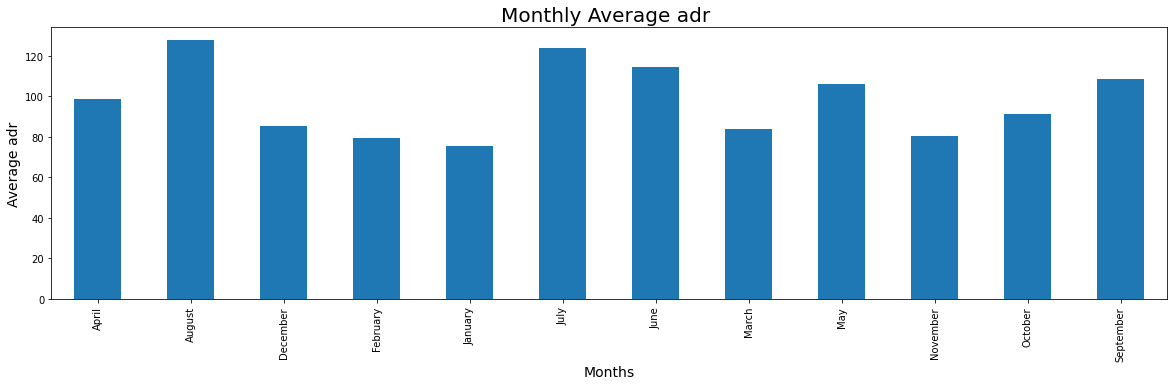

In [225]:
non_canceled_df.groupby(non_canceled_df['arrival_date_month'])['adr'].mean().plot(kind='bar', figsize=(20,5))
plt.title('Monthly Average adr ', fontsize=20)
plt.xlabel('Months' , fontsize=14)
plt.ylabel('Average adr' , fontsize=14)


**MILESTONE 2:** The optimal length of stay in order to get the best daily rate?

In [202]:
# total stay at hotel will be sum of number of night stay in week and weekend
non_canceled_df['length_of_stay'] = non_canceled_df['stays_in_weekend_nights'] + non_canceled_df['stays_in_week_nights']

Text(0, 0.5, 'Average adr')

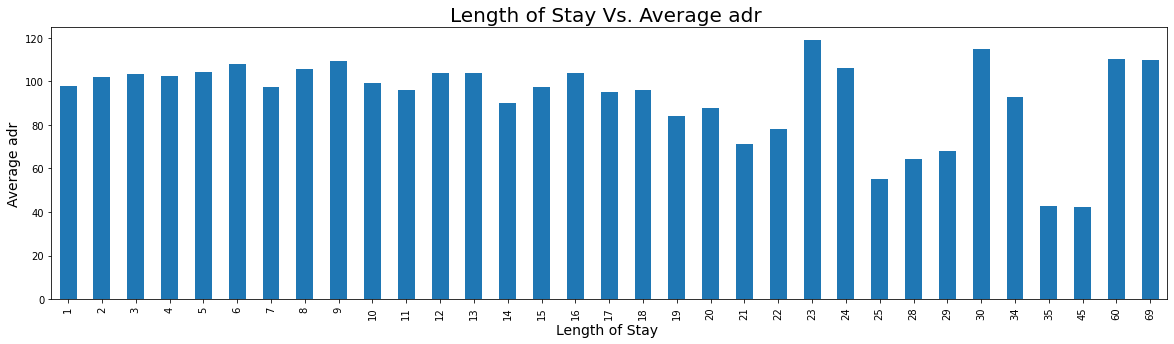

In [226]:
non_canceled_df.groupby(non_canceled_df['length_of_stay'])['adr'].mean().plot(kind='bar', figsize=(20,5))
plt.title('Length of Stay Vs. Average adr ', fontsize=20)
plt.xlabel('Length of Stay ' , fontsize=14)
plt.ylabel('Average adr' , fontsize=14)

Text(0, 0.5, 'No. of Bookings')

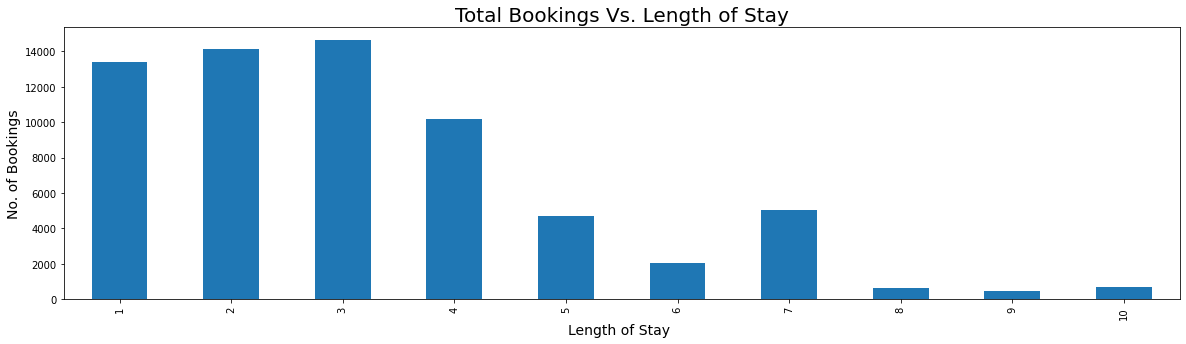

In [239]:
non_canceled_df.groupby(non_canceled_df['length_of_stay'])['hotel'].size()[:10].plot(kind='bar', figsize=(20,5))
plt.title('Total Bookings Vs. Length of Stay', fontsize=20)
plt.xlabel('Length of Stay ' , fontsize=14)
plt.ylabel('No. of Bookings' , fontsize=14)

Text(0, 0.5, 'No. of Bookings')

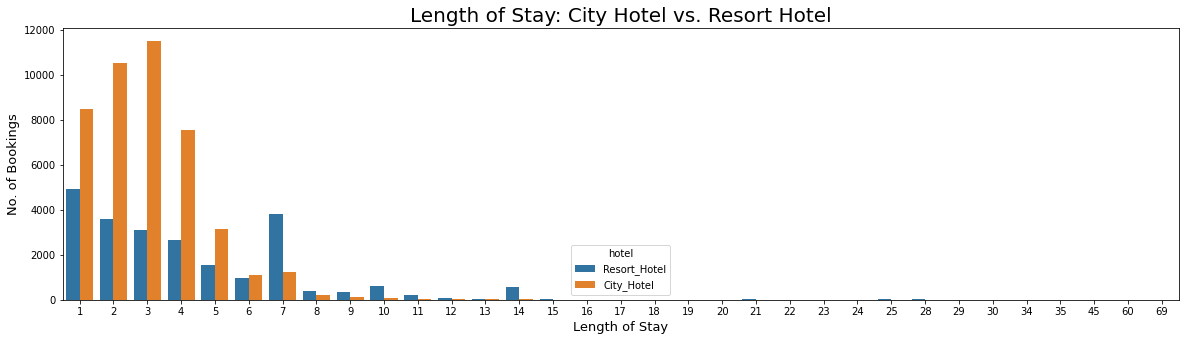

In [223]:
plt.rcParams['figure.figsize']= (20,5)
sns.countplot(data = non_canceled_df, x = 'length_of_stay', hue = 'hotel')
plt.title('Length of Stay: City Hotel vs. Resort Hotel',fontsize=20)
plt.xlabel('Length of Stay', fontsize=13)
plt.ylabel('No. of Bookings', fontsize=13)

**MILESTONE 3:** What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? 

In [204]:
corr_non_canceled_df = non_canceled_df.corr()

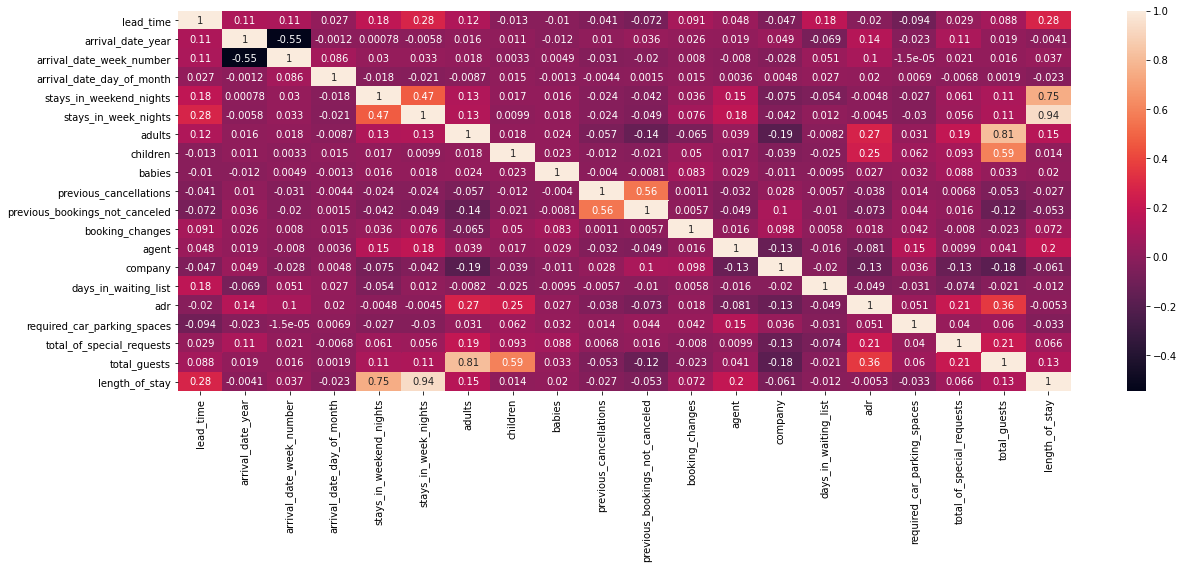

In [205]:
plt.figure(figsize=(20,7))
sns.heatmap(corr_non_canceled_df, annot=True)

Text(0, 0.5, 'Average adr')

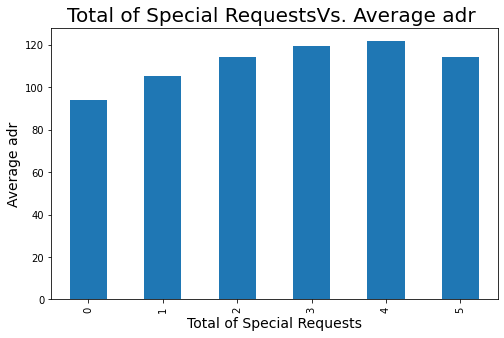

In [232]:
non_canceled_df.groupby(non_canceled_df['total_of_special_requests'])['adr'].mean().plot(kind='bar', figsize=(8,5))
plt.title('Total of Special RequestsVs. Average adr ', fontsize=20)
plt.xlabel('Total of Special Requests' , fontsize=14)
plt.ylabel('Average adr' , fontsize=14)

Text(0, 0.5, 'Average Total of Special Requests')

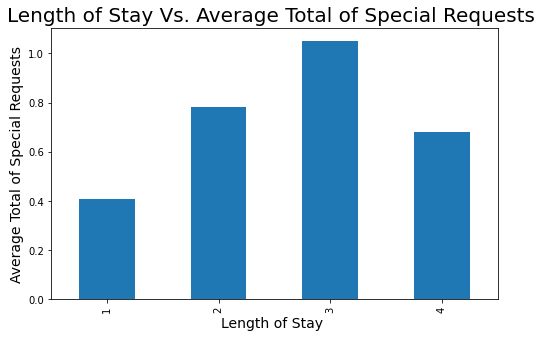

In [233]:
non_canceled_df.groupby(non_canceled_df['adults'])['total_of_special_requests'].mean()[1:5].plot(kind='bar', figsize=(8,5))
plt.title('Length of Stay Vs. Average Total of Special Requests ', fontsize=20)
plt.xlabel('Length of Stay ' , fontsize=14)
plt.ylabel('Average Total of Special Requests' , fontsize=14)

Text(0, 0.5, 'Average Total of Special Requests')

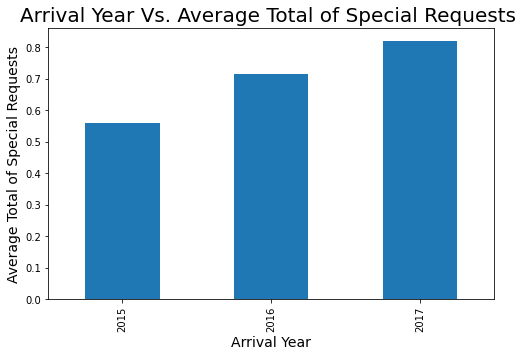

In [234]:
non_canceled_df.groupby(non_canceled_df['arrival_date_year'])['total_of_special_requests'].mean().plot(kind='bar', figsize=(8,5))
plt.title('Arrival Year Vs. Average Total of Special Requests ', fontsize=20)
plt.xlabel('Arrival Year' , fontsize=14)
plt.ylabel('Average Total of Special Requests' , fontsize=14)

Text(0, 0.5, 'Average Total of Special Requests')

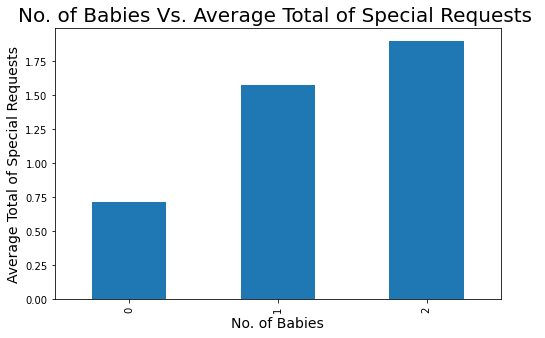

In [237]:
non_canceled_df.groupby(non_canceled_df['babies'])['total_of_special_requests'].mean()[:3].plot(kind='bar', figsize=(8,5))
plt.title('No. of Babies Vs. Average Total of Special Requests ', fontsize=20)
plt.xlabel('No. of Babies' , fontsize=14)
plt.ylabel('Average Total of Special Requests' , fontsize=14)

Text(0, 0.5, 'Average Lead Time')

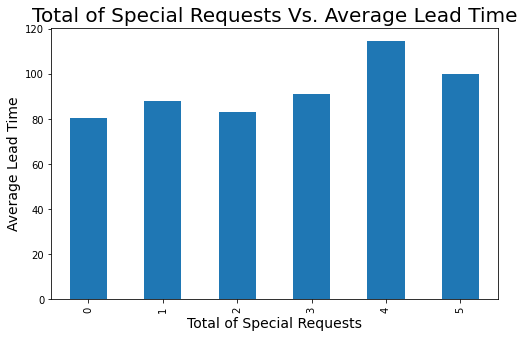

In [238]:
non_canceled_df.groupby(non_canceled_df['total_of_special_requests'])['lead_time'].mean().plot(kind='bar', figsize=(8,5))
plt.title('Total of Special Requests Vs. Average Lead Time', fontsize=20)
plt.xlabel('Total of Special Requests' , fontsize=14)
plt.ylabel('Average Lead Time' , fontsize=14)

**There bookings with no refund also. So lets deep dive into deposit types**

In [246]:
df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

Text(0, 0.5, '')

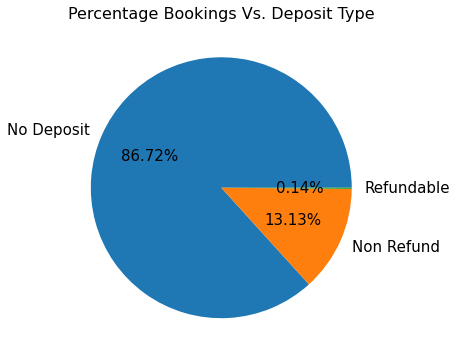

In [286]:
df.groupby(df['deposit_type']).size().plot(kind='pie', fontsize=15, autopct='%.2f%%',  figsize=(6, 6))
plt.title('Percentage Bookings Vs. Deposit Type', fontsize=16)
plt.ylabel('' , fontsize=16)


Refundable deposit bookings are alomst neglegible (0.14%), so neglecting this values for next analysis.

Text(0, 0.5, 'Average adr')

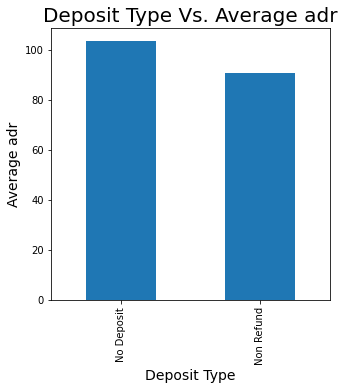

In [288]:
df.groupby(df['deposit_type'])['adr'].mean()[:2].plot(kind='bar', figsize=(5,5))
plt.title('Deposit Type Vs. Average adr', fontsize=20)
plt.xlabel('Deposit Type' , fontsize=14)
plt.ylabel('Average adr' , fontsize=14)

Text(0, 0.5, 'Average Lead Time')

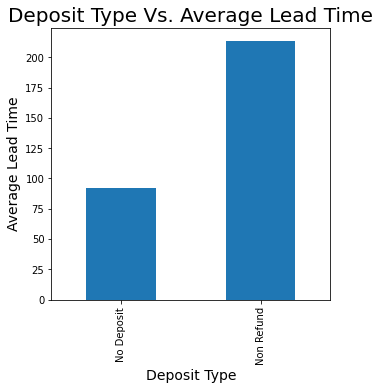

In [290]:
df.groupby(df['deposit_type'])['lead_time'].mean()[:2].plot(kind='bar', figsize=(5,5))
plt.title('Deposit Type Vs. Average Lead Time', fontsize=20)
plt.xlabel('Deposit Type' , fontsize=14)
plt.ylabel('Average Lead Time' , fontsize=14)

In [250]:
no_refund_df =df[df['deposit_type']=='Non Refund']

Text(0.5, 1.0, 'Canceled Bookings: City Hotel vs. Resort Hotel')

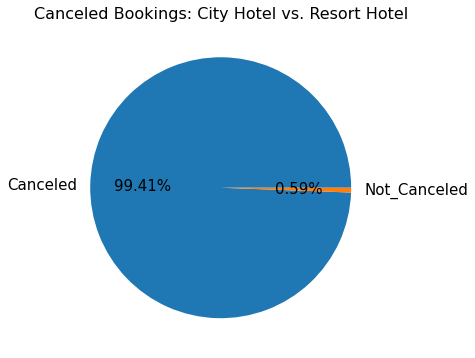

In [260]:
no_refund_df.groupby(no_refund_df['is_canceled']).size().plot(kind='pie', fontsize=15, autopct='%.2f%%',  figsize=(6, 6))
plt.ylabel('' , fontsize=16)
plt.title('Canceled Bookings: City Hotel vs. Resort Hotel', fontsize=16)

In [291]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort_Hotel,Not_Canceled,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,Not_Repeated,0,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort_Hotel,Not_Canceled,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,Not_Repeated,0,0,A,A,0,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort_Hotel,Not_Canceled,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,Not_Repeated,0,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort_Hotel,Not_Canceled,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,Not_Repeated,0,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort_Hotel,Not_Canceled,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,Not_Repeated,0,0,C,C,0,No Deposit,0,0,0,Transient,107.0,0,0,Check-Out,2015-07-03
